# Data Science Project

Anda diminta oleh pimpinan untuk membuat model prediksi klasifikasi atas `income` pada dataset **Adult Income**. Data ini diperoleh dari Machine Learning Repository UCI (https://archive.ics.uci.edu/ml/datasets/Adult).Target variabel (`income`) merupakan data categorical dengan 2 nilai `<=50k` dan `>50k`. 

Kemudian, Anda diminta untuk membandingkan model yang paling baik berdasarkan eksperimen yang Anda lakukan terhadap performa model.


Langkah pertama adalah *import library*.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# import dataset
df_adult = pd.read_csv('adult.csv')

In [44]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Apakah kita langsung dapat menggunakan data ini secara langsung?

**Tentu Tidak !**

Kali ini, kita akan memperkenalkan tahapan-tahapan yang akan Anda lakukan sebagai data scientist. Pada umumnya, tahapan yang bisa kita lakukan setidaknya terdiri dari beberapa tahapan berikut ini:

1. Data Cleaning atau Preprocessing
2. Explorasi Data
3. Pengolahan Data
4. Evaluasi

Kali ini, kita akan melakukan tahapan 1 dan 2 terlebih dahulu.

## 1. Data Cleaning / Data Preprocessing / Data Wrangling
Tahap pertama adalah melakukan pembersihan data, tahapan ini penting karena sebagian besar pekerjaan Data Analis berkutat pada bagian ini dan tahap explorasi data. 

Di tahapan ini hal yang pertama kali dilakukan adalah melakukan *peek* data menggunakan fungsi `head`.

In [45]:
df_adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Dari data tersebut di atas, terdapat 2 jenis data yaitu `int64` dan `object`. Tipe data `object` pada umumnya dapat berupa `String` yang juga pada umumnya, data yang bersifat categorical. Dari kolom tersebut di atas, dapat kita ketahui bahwa terdapat 48.842 jenis data.

Hal yang paling penting di tahapan ini adalah:
1. Cek atas data **NULL** <br>
Data **NULL** tersebut bisa berbentuk tanda `-`, spasi, `NA` ataupun tanda lainnya. Strategi atas data **NULL** tersebut bisa kita lakukan *impute* atau pengisian, atau bisa dihilangkan seluruh baris (row) data tersebut. 
2. Cek atas data anomali (outlier) <br>
Data anomali dapat dianalisis dengan metode *standard deviasi*. Normalnya, data yang bernilai bilangan riil bisa kita cari dan hilangkan agar tidak mempengaruhi performa dari model kita.

Data anomali lainnya, bisa berupa **kesalahan ketik (typo)** ataupun nilai yang sebenarnya sama tetapi dituliskan berbeda.


Oleh karena itu, kita bisa melakukan cek satu per satu untuk kolom berikut ini:

1. `workclass`
2. `education`
3. `marital-status`
4. `occupation`
5. `relatiohship`
6. `race`
7. `gender`
8. `native-country`
9. `income`

In [47]:
col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country']
for c in col:
    print(c,':',df_adult[c].unique())

workclass : ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education : ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
marital-status : ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation : ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship : ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race : ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender : ['Male' 'Female']
native-country : ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany

Namun, kita hanya akan fokus terhadap 4 kolom saja yaitu `workclass`, `marital-status`, `country`, `occupation`, karena terlihat dari data categorical di atas, ada beberapa anomali salah satunya adalah nilai `?`.

### Kolom workclass

In [48]:
# kolom workclass
df_adult.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Ada beberapa **anomali** pada value di dalam kolom `workclass` di antaranya, nilai `?` dan nilai `Self-emp-inc` yang sebenarnya sama dengan `Self-emp-not-inc`. 

Solusi: 
1. Lakukan perubahan pada nilai `?` menjadi `NA`, karena nilai `?` tidak dapat didefinisikan.
2. Lakukan *merge* untuk nilai kategori pada `Self-emp-inc` dan `Self-emp-not-inc`.

Lakukan cek nilai `NA` apakah ada di dalam dataset.

In [49]:
# cek NA value di kolom workclass
df_adult.workclass.isnull().any()

False

Untuk mengubah nilai `?` menjadi `NA` ada **banyak** cara.


Anda jangan terpaku pada salah satu cara, bahkan Anda bisa membuat cara baru.

In [94]:
df_adult_workclass = df_adult[['workclass']]

df_adult_workclass.head()

,workclass
0,Private
1,Private
2,Gov
3,Private
5,Private


In [104]:
# hapus data ? dengan
df_adult.workclass = df_adult.workclass.replace(['?'], np.nan)

In [106]:
#chek hasilnya apakah ? udah hilang
df_adult.workclass.value_counts()

Private          33906
Gov               6549
Self-employed     5557
Without-pay         21
Never-worked        10
Name: workclass, dtype: int64

In [50]:
# menggunakan apply method dan lambda
df_adult.workclass = df_adult.workclass.apply(lambda x: np.nan if x.startswith('?') else x)

# cek atas perubahan yang sudah kita lakukan
df_adult.workclass.unique()

array(['Private', 'Local-gov', nan, 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

Sekarang, kita memiliki data **NULL** !

In [51]:
# cek NA value di kolom workclass
df_adult.workclass.isnull().any()

True

Untuk melakukan merge atas nilai kategori `Self-emp-inc` dan `Self-emp-not-inc` menjadi `Self-employed` kita menggunakan metode yang sama seperti di atas. Namun, kali ini kita akan menggunakan cara yang sedikit berbeda, yaitu dengan membuat suatu fungsi baru yaitu `change_workclass`. Di sini, fungsi ini akan di-passing sebagai *argument* dalam method `apply`. Begitu juga dengan Government.

In [107]:
def change_selfemployed(x):
    if x =='Self-emp-not-inc':
        return 'Self-employed'
    elif x =='Self-emp-inc':
        return 'Self-employed'
    else:
        return x
    
def change_government(x):
    if x =='Local-gov' or x == 'Federal-gov' or x=='State-gov':
        return 'Gov'
    else:
        return x

In [108]:
# mengganti kategori nilai untuk self employed
df_adult.workclass = df_adult.workclass.apply(change_selfemployed)

# mengganti kategori nilai untuk government
df_adult.workclass = df_adult.workclass.apply(change_government)

# cek atas perubahan yang sudah kita lakukan
df_adult.workclass.unique()

array(['Private', 'Gov', 'Self-employed', 'Without-pay', 'Never-worked'],
      dtype=object)

### Kolom Marital-status

Kita mau mengubah status pernikahan menjadi 3 saja, `Married`, `Not-married`, dan `Never-married`. 

In [109]:
df_adult['marital-status'].value_counts()

Married          22068
Never-married    14882
Not-Married       9093
Name: marital-status, dtype: int64

In [55]:
def change_married_status(x):
    # ubah Divoroced, separated dan widowed menjadi 'Not-Married'
    if x == 'Divorced' or x == 'Separated' or x == 'Widowed':
        return 'Not-Married'
    # 'Never-married' tetap
    elif x == 'Never-married':
        return x
    # yang lain menjadi 'Married'
    else:
        return 'Married'

In [110]:
df_adult['marital-status'] = df_adult['marital-status'].apply(change_married_status)
df_adult['marital-status'].unique()

array(['Never-married', 'Married'], dtype=object)

### Kolom Country

Dari data `native-country` terlihat bahwa kita bisa menginginkan untuk melakukan **grouping** atas negara-negara asal tersebut ke dalam bentuk region yang sama, hal ini bertujuan untuk memberikan untuk *memberikan tambahan kekuatan* atas fitur `native-country`. Tentunya, hal ini merupakan diskresi dari masing-masing analis.

In [57]:
df_adult['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Kita mengingkan adanya penggabungan antara negara dengan region yang sama. Maka, kita akan membaginya menjadi 5 bagian yaitu `north-america`, `asia`, `south-america`, `europe`, dan  `others`.

Terdapat 2 cara yang bisa digunakan, cara paling cepat untuk menghemat memory adalah sebagai berikut:
```python
# buat dictionary
dict_countries = {
    'north_america' : ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala", "Haiti", "Honduras", 
                         "Jamaica", "Mexico", "Nicaragua","Outlying-US(Guam-USVI-etc)", "Puerto-Rico", 
                       "Trinadad&Tobago","United-States"], 
    'asia' : ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
              "Philippines", "Taiwan", "Thailand", "Vietnam"],
    'south_america ' : ["Columbia", "Ecuador", "Peru"],
    'europe' : ["England", "France", "Germany", "Greece", "Holand-Netherlands","Hungary", "Ireland", "Italy",
                    "Poland", "Portugal", "Scotland", "Yugoslavia"], 
    'others' : ["South", "?"]
    }

# buat fungsi 
def change_toregion(x):
    for k,v in dict_countries.items():
        if x in v:
            return k
        
# apply perubahan pada semua data
df_adult['native-country'] = df_adult['native-country'].apply(change_toregion)
```

Akan tetapi, kita akan menggunakan cara yang paling sederhana sebagai berikut

In [58]:
# buat list untuk setiap region
north_america = ["Canada", "Cuba", "Dominican-Republic", "El-Salvador", "Guatemala", "Haiti", "Honduras", 
 "Jamaica", "Mexico", "Nicaragua","Outlying-US(Guam-USVI-etc)", "Puerto-Rico", 
 "Trinadad&Tobago","United-States"]
asia = ["Cambodia", "China", "Hong", "India", "Iran", "Japan", "Laos",
          "Philippines", "Taiwan", "Thailand", "Vietnam"]
south_america = ["Columbia", "Ecuador", "Peru"]
europe = ["England", "France", "Germany", "Greece", "Holand-Netherlands","Hungary", "Ireland", 
          "Italy", "Poland", "Portugal", "Scotland", "Yugoslavia"]
others = ["South", "?"]

In [59]:
# apply perubahan satu persatu 
# north_america

# asia

# south_america

# europe

# others


In [60]:
# perhatikan perubahannya
df_adult['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

### Kolom Occupation

Kali ini kita hanya akan mengganti nilai `?` menjadi `NaN` dengan cara yang sama di atas.

In [61]:
df_adult.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [62]:
# ubah ? menjadi NaN atau np.nan


In [63]:
df_adult.occupation.unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

## 2. Data Exploration

Tahap yang kedua ini sangat penting untuk dilakukan, umumnya kita melihat anomali yang terjadi di data dan melakukan tindakan yang diperlukan. Selanjutnya, tahapan berikut adalah melakukan visualisasi atas data yang ada.

### Cari data anomali dan perbaiki
Saat ini kita memiliki banyak data NULL berupa `NaN`, langkah yang bisa kita lakukan adalah pengisian *(impute)* atau penghapusan. Pilihan pertama dapat kita lakukan apabila dirasa penting, namun langkah kedualah yang akan kita lakukan untuk kesederhanaan.

In [64]:
len(df_adult[df_adult.occupation.isnull() == True])

0

In [65]:
len(df_adult[df_adult.workclass.isnull() == True])

2799

In [66]:
len(df_adult[df_adult.workclass.isnull() & df_adult.occupation.isnull()])

0

In [67]:
df_adult[df_adult.workclass.isnull() & df_adult.occupation.isnull()].head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


Dapat dilihat bahwa sebanyak 2.799 data terdapat 2 nilai `NaN` pada satu baris untuk kolom `occupation` dan `workclass`. Sedangkan, 2.809 hanya `occupation`.

Karena kita ingin memprediksi besaran `income` maka, kita harus memiliki nilai ini. Oleh karena itu, kita akan menghilangkan semua data `NaN` ini.

In [68]:
# Hapus record yang memiliki nilai NaN pada attributnya
df_adult = df_adult.dropna(how='any')

In [69]:
len(df_adult)

46043

Sekarang, kita hanya memiliki 46.033 dataset setelah dibersihkan.

### Cari Informasi Sebanyak-banyaknya dari data
Tahapan ini dapat kita sebut dengan **Data Exploration**, salah satu tools yang kita gunakan adalah **visualisasi**. Teknik ini menjadi penting karena kita bisa mendapatkan informasi yang sebelumnya tidak bisa didapatkan hanya dari angka dan kata.

Berikut ini kita tampilkan plot informasi pada setiap kolom terhadap income

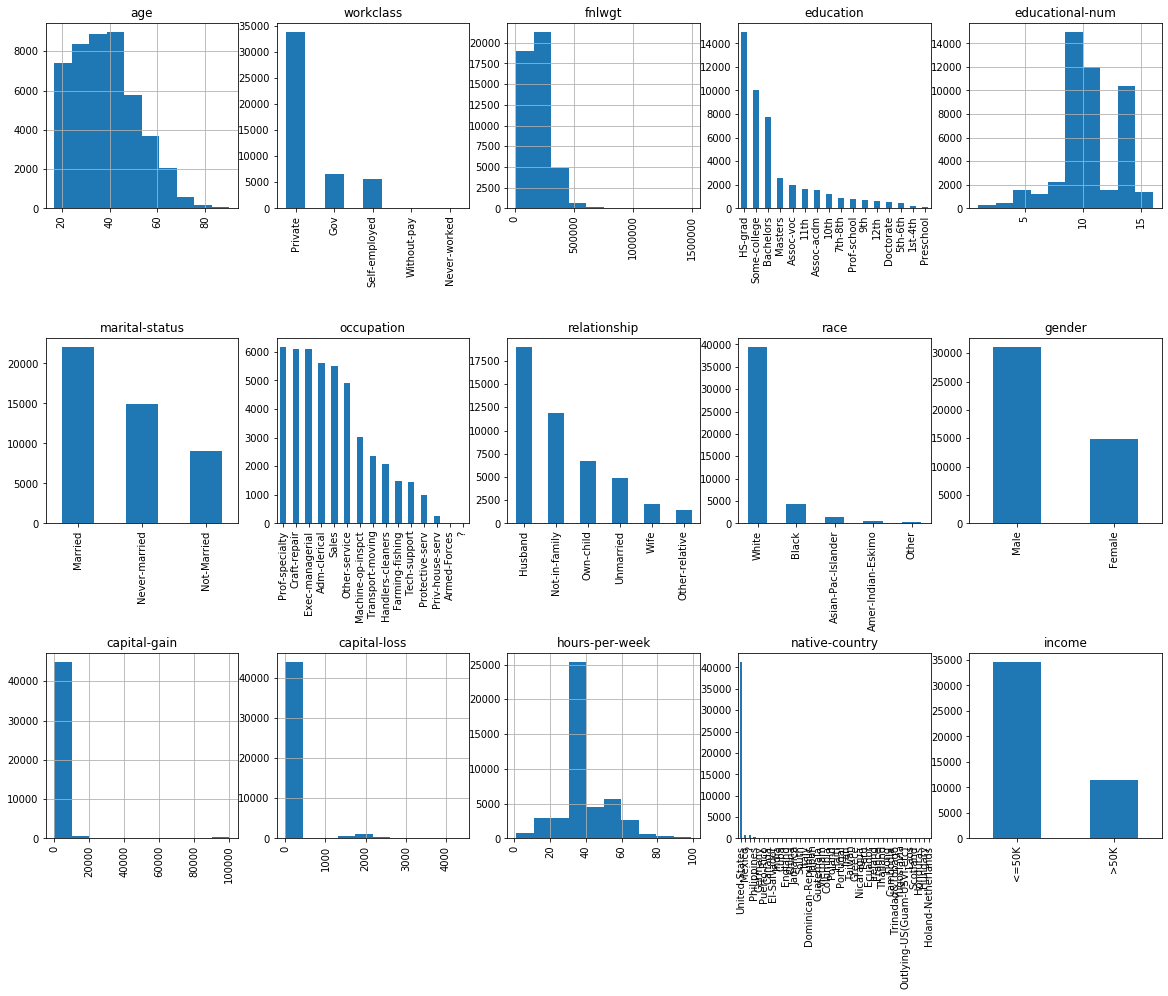

In [70]:
from math import ceil

fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(df_adult.shape[1]) / cols)
# looping setiap kolom dan indeksnya
for i, column in enumerate(df_adult.columns):
    # urutan setiap subplot
    ax = fig.add_subplot(rows, cols, i + 1)
    # set judul chart
    ax.set_title(column)
    
    if df_adult.dtypes[column] == np.object:
        df_adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_adult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.7, wspace=0.2)

Dapat dilihat dari data di atas, sebagian besar data ada di daerah `north_america`, dan sebagian besar income di bawah $50,000. Di samping itu, ras yang mendominasi adalah kulit putih dan gendernya pria.


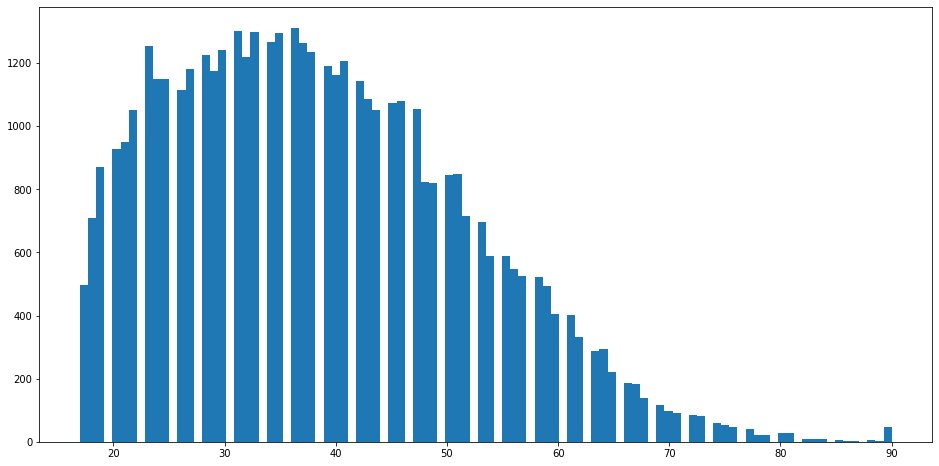

In [71]:
plt.figure(figsize=(16, 8))
plt.hist(df_adult.age, bins=100, normed=None, histtype='bar', stacked=True)
plt.show()


Berikutnya kita akan melakukan visualisasi dengan menggunakan *heatmap*, unutk mendapatkan korelasi antara variabel. Akan tetapi, sebelumnya kita akan melakukan `label encoding` pada target variabel dan `gender`, karena mereka adalah binary variabel.

In [72]:
salary_map={'<=50K': 1,'>50K':0}

df_adult.income = df_adult['income'].map(salary_map).astype(int)

df_adult['gender'] = df_adult['gender'].map({'Male':1,'Female':0}).astype(int)


Di samping itu, terdapat data categorical yaitu `education` yang akan kita lakukan encoding, karena terlihat sangat mirip dengan `educational-num`. Untuk itu, kita coba lakukan `LabelEncoder` pada fitur ini.

In [73]:
df_adult.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder

# Lakukan Label Encoder pada kolom education


### Visualisasi heatmap untuk mencari relasi variabel
Proses ini penting, terutama untuk menghilangkan variabel yang sangat berkorelasi. 

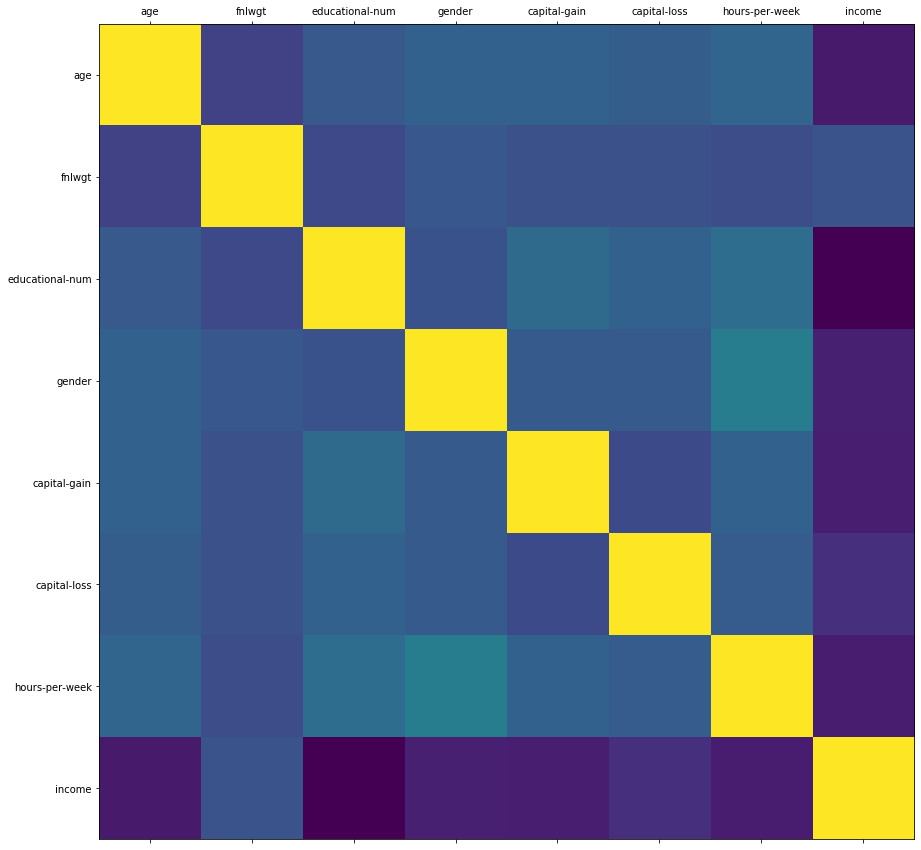

In [75]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

plot_correlation(df_adult)


Dari plot di atas terlihat dengan jelas bahwa `education` dan `educational-num` memang sangat berkaitan. Maka kita akan buang salah satu, tetapi `educational-num` ternyata memiliki properti **ordinal**, yaitu berurutan dengan makna dimana angka lebih besar, memiliki tingkat edukasi yang lebih tinggi.

In [76]:
del df_adult['education']

### Encode Categorical Data
Tahapan ini merupakan tahap akhir sebelum dilakukan data analisis.

Seluruh fitur data yang bersifat categorical string, harus diubah menjadi angka. Terdapat 2 cara yang umum dilakukan, yaitu cara manual dengan mengaplikasikan fungsi `replace`, `map`, `apply` dan lainnya, serta cara lain yaitu menggunakan fungsi `LabelEncoder`. 

In [77]:
df_adult.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [78]:
# Lakukan Label Encoder pada 
# native-country

# marital-status

# relationship

# race

# occupation

# workclass


## 3. Data Analisis
Tahap ini merupakan tahapan pembentukan model dari dataset yang ada. 
Kali ini, Anda akan diminta untuk melakukan *model selection* yang artinya, melakukan pemilihan model yang paling bagus di antara model-model yang ada. 

Sebagaimana biasa, kita akan melakukan `train_test_split`. Kali ini, kita akan memisahkan antara data training dan data validasi.

In [79]:
df = df_adult.copy()

In [80]:
from sklearn.model_selection import train_test_split

# X merupakan dataset kecuali target variabel
X = df.drop(['income'],axis=1)
y = df.income

# kita gunakan 70% data training
split_size=0.3

# Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

# Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [81]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Lakukan Pembuatan model dengan menggunakan `RandomForestClassifier`

In [82]:
# import library

# buat objek model

# fit model

# panggil fungsi predict
RF_prediction = ....

SyntaxError: invalid syntax (<ipython-input-82-80f3d37c2483>, line 8)

Buat evaluasi atas model `RandomForestClassifier`.

In [ ]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test, RF_prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test, RF_prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test, RF_prediction))

Lakukan Pembuatan model dengan menggunakan `SVC`

In [ ]:
# import library

# buat objek model

# fit model

# panggil fungsi predict
svc_prediction = ....

Buat evaluasi atas model `SVC`.

In [ ]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,svc_prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,svc_prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,svc_prediction))